## Quasi one dimensional scattering amplitudes
This script plots the quasi-one-dimensional scattering amplitudes for the p-wave interacting 40K like in Jackson et al. 2023 Fig. 3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent.parent))

from amo.constants import *


Define scattering parameters for M_L = +-1 resonance (198.308G)

In [8]:
from functools import partial
from amo.resonant_scattering import *

V3D = partial(scattering_volume, B0=B0_77_pm1, DeltaB=DeltaB_77_pm1, Vbg=Vbg_77_pm1)  # Functions of B.
inv_R3D = lambda B: inverse_effective_range(V3D(B), R0=R0_77_pm1, Vbg=Vbg_77_pm1)  # Function of V.

V3D_m0 = partial(scattering_volume, B0=B0_77_0, DeltaB=DeltaB_77_0, Vbg=Vbg_77_0)  # Functions of B.
inv_R3D_m0 = lambda B: inverse_effective_range(V3D_m0(B), R0=R0_77_0, Vbg=Vbg_77_0)  # Function of V.

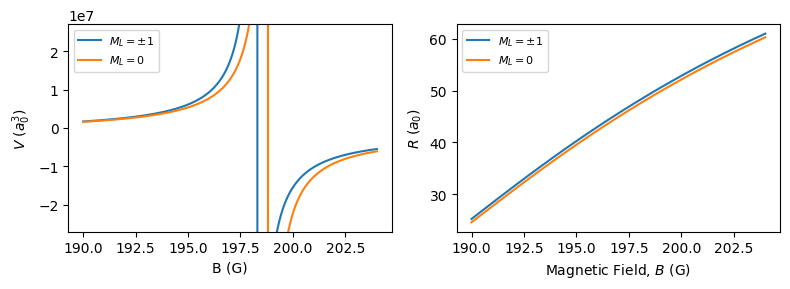

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

num = 1000
B = np.linspace(190, 204, 1000)  # G

ax = axs[0]
ax.set(ylabel=r"$V$ ($a_0^3$)", xlabel=r"B (G)")
ax.plot(B, V3D(B)/a_0**3, label=r"$M_L=\pm 1$")
ax.plot(B, V3D_m0(B)/a_0**3, label=r"$M_L=0$")

ax.set_ylim(-3e2**3, 3e2**3)
ax.legend(fontsize=8, loc="upper left")

ax = axs[1]
ax.set(ylabel=r"$R$ ($a_0$)", xlabel=r"Magnetic Field, $B$ (G)")
ax.plot(B, 1/inv_R3D(B)/a_0, label=r"$M_L=\pm 1$")
ax.plot(B, 1/inv_R3D_m0(B)/a_0, label=r"$M_L=0$")

ax.legend(fontsize=8, loc="upper left")

fig.tight_layout()
plt.show()

Define q1D scattering params and amplitudes

In [12]:
from amo.quantum_gas import oscillator_length
from scipy.optimize import root_scalar

omega_perp = 2 * pi * 100e3  # 100 kHz
a_osc = oscillator_length(omega_perp) * np.sqrt(2)  # reduced mass

inv_a_odd = lambda B: q1d_inverse_odd_scattering_length(V3D(B), inv_R3D(B), a_osc)
r_odd = lambda B: q1d_odd_effective_range(inv_R3D(B), a_osc)

f_odd = lambda Ek, B: 1/q1d_inverse_odd_scattering_amplitude(np.sqrt(2 * mK * Ek) / hbar, 
                                                           inv_a_odd(B), r_odd(V3D(B)))


def q1d_odd_resonant_field(B_guess=199.0):
    root_results = root_scalar(inv_a_odd, x0=B_guess, x1=B_guess+1.0)
    return root_results.root


B_res_odd = q1d_odd_resonant_field()
print(f"Odd-wave resonance at B = {B_res_odd:.3f} G")


a_even = lambda B: q1d_even_scattering_length(V3D(B), inv_R3D(B), a_osc)
r_even = lambda B: q1d_even_effective_range(inv_R3D(B), a_osc)

f_even = lambda Ek, B: 1/q1d_inverse_even_scattering_amplitude(np.sqrt(2 * mK * Ek) / hbar, 
                                                           a_even(B), r_even(B))

a_even_m0 = lambda B: q1d_even_scattering_length(V3D_m0(B), inv_R3D_m0(B), a_osc)
r_even_m0 = lambda B: q1d_even_effective_range(inv_R3D_m0(B), a_osc)

f_even_m0 = lambda Ek, B: 1/q1d_inverse_even_scattering_amplitude(np.sqrt(2 * mK * Ek) / hbar, 
                                                           a_even_m0(B), r_even_m0(B))


def q1d_even_resonant_field(a_even, B_guess=199.0):
    root_results = root_scalar(a_even, x0=B_guess, x1=B_guess+1.0)
    return root_results.root

B_res_even = q1d_even_resonant_field(a_even)
print(f"Even-wave x resonance at B = {B_res_even:.3f} G")

B_res_even_m0 = q1d_even_resonant_field(a_even_m0)
print(f"Even-wave z resonance at B =" + f" {B_res_even_m0:.3f} G")

Odd-wave resonance at B = 198.874 G
Even-wave x resonance at B = 199.293 G
Even-wave z resonance at B = 199.821 G


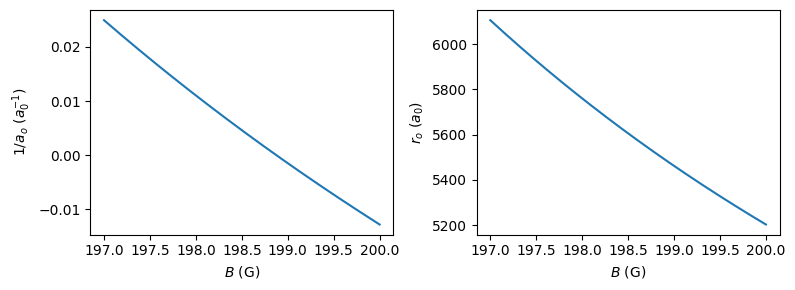

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

num = 1000
B = np.linspace(197, 200, 1000)  # G

ax = axs[0]
ax.set(ylabel=r"$1/a_o$ ($a_0^{-1}$)", xlabel=r"$B$ (G)")
ax.plot(B, a_0*inv_a_odd(B))
# ax.set_ylim(-3e2**3, 3e2**3)
# ax.legend(fontsize=8, loc="upper left")

ax = axs[1]
ax.set(ylabel=r"$r_o$ ($a_0$)", xlabel=r"$B$ (G)")
ax.plot(B, r_odd(B)/a_0)
# ax.plot(B, a_0/inv_R3D(B))
# ax.legend(fontsize=8, loc="upper left")

fig.tight_layout()
# fig.savefig("breit_rabi.png", dpi=300)
plt.show()

### Plotting scattering amplitudes

In [6]:
# colour_list = plt.rcParams['axes.prop_cycle'].by_key()['color']

# fig, axs = plt.subplots(2, 1, figsize=(6, 6))
# num = 1000
# B = np.linspace(198, 203, 1000)  # G
# Ek = np.linspace(0, 100, num)  # kHz

# ax = axs[0]
# ax.set(ylabel=r"$|f|^2$", xlabel=r"Collisional energy (kHz)")

# ax.plot(Ek, np.abs(f_odd(Ek*h*1e3), ))

# ax.legend(fontsize=8, loc="upper left")

# ax = axs[1]
# ax.set(ylabel=r"$|f|^2$", xlabel=r"Magnetic Field, $B$ (G)")
# ax.legend(fontsize=8, loc="upper left")


# fig.tight_layout()
# # fig.savefig("breit_rabi.png", dpi=300)
# plt.show()